# Problem Statement

Old and used cars sales data is available. We have to make a model for these cars price prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars_data=pd.read_csv('cars_sampled_2.csv')

In [3]:
cars_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


So, Here in the data, dateCrawled is the date when the ad first crawled.all the field values are taken from this date.
abtest is version of ad rolled. notRepairedDamage state if there is a damage to the car which has been rectified as yes or no if it is not rectified. dateCreated means date when the ad at advetisement agency created. lastSeen is date when the crawler saw this ad lat online.

In [53]:
import copy
df= copy.deepcopy(cars_data)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

From above it can be seen that there are some null columns with null values also

In [55]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to change the scientific notation in float till 3 decimal values
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


From above it can be seen that the price is highly scewed values. the minimum is 0 and maximum in 8 digits values.similarly in year of registration some years minimum is 1000 which does not seems realistic.

In [56]:
#dropping unwanted columns
df=df.drop(columns= ['dateCrawled', 'name', 'dateCreated', 'postalCode', 'lastSeen'  ], axis=1)

In [57]:
df.shape

(50001, 14)

In [58]:
#Removing the duplicate records
df.drop_duplicates(keep='first', inplace=True)

In [59]:
df.shape

(49531, 14)

duplicate records have been dropped 

In [60]:
#checking for null values 
df.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [61]:
#cleaning for year of registration

 Since in year of registration the minimum value was 1000, which seems so unrealistic. we will limit our analysis on lat 50-60 years of data only

In [62]:
year_count= df['yearOfRegistration'].value_counts().sort_index()

In [63]:
year_count

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

max year range is also  not looks okay. we will limit our analysis from 1950 -2022 (present year) data only

In [64]:
sum(df['yearOfRegistration']>2022)

24

In [65]:
sum(df['yearOfRegistration']<1950)

38

In [66]:
import seaborn as sns

In [67]:
# setting dimension for all the plots
sns.set(rc={'figure.figsize': (12,8)})

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

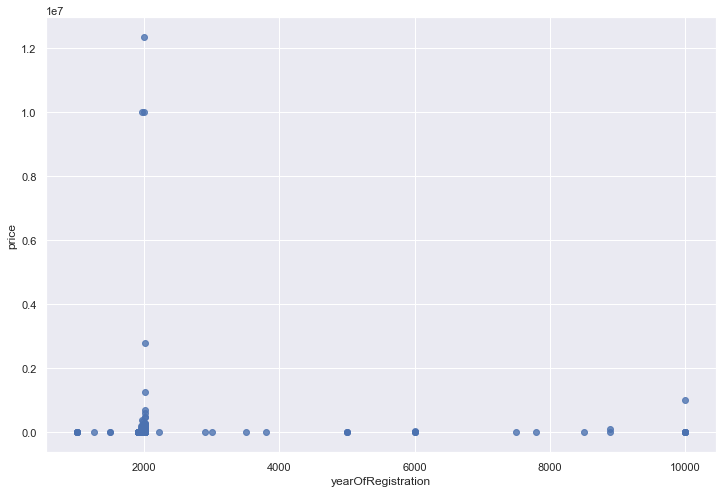

In [68]:
sns.regplot(x=df['yearOfRegistration'], y= df['price'], scatter=True, fit_reg= False, data=df)

so total 24+38 rows will be removed and our working range wiill be from 1950 -2022

In [69]:
# cleaning for Price

In [70]:
price_count= df['price'].value_counts().sort_index()
price_count

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

the price range is also doesnot seems good, so we have to remove very high and very low data points

C:\Users\psoms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

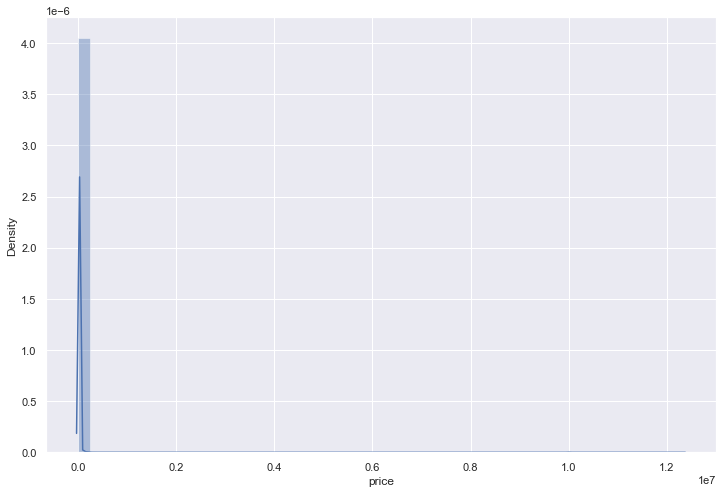

In [71]:
sns.distplot(df['price'])

In [72]:
df['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

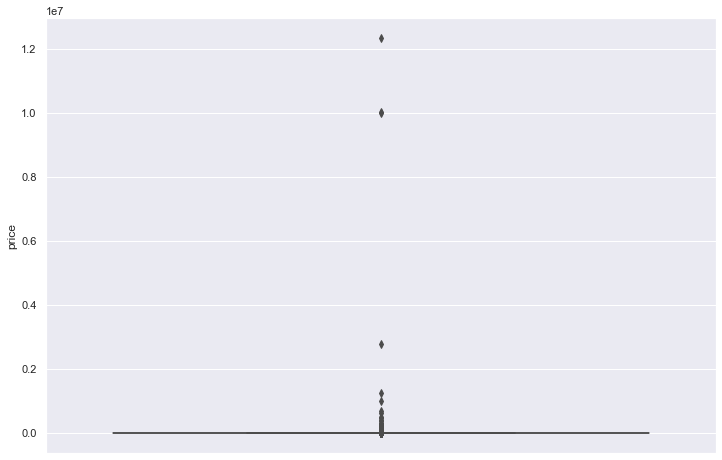

In [73]:
sns.boxplot(y= df['price'])

So, the price range is too variable. 
let us set the range from 100-200000 $ range

In [74]:
sum(df['price']>200000)

24

In [75]:
sum(df['price']<100)

1748

So we will discard around 24+1748 rows to set our working prixce range from 100-200000

In [76]:
#cleaning for PowerPS 

In [77]:
power_count= df['powerPS'].value_counts().sort_index()
power_count

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

C:\Users\psoms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

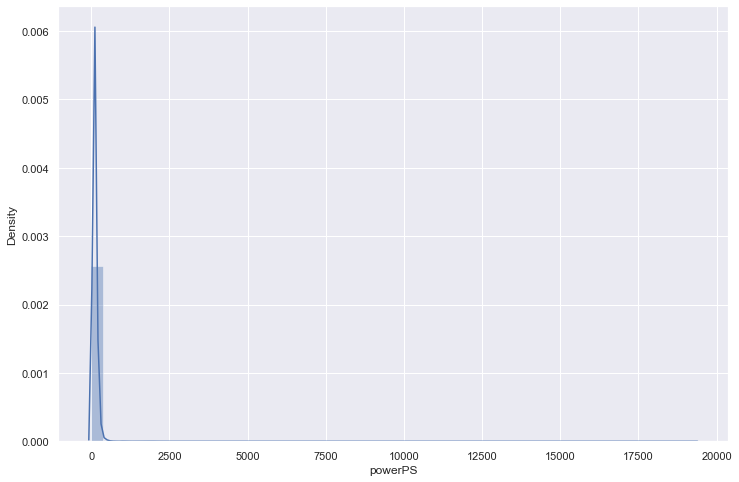

In [78]:
sns.distplot(df['powerPS'])

SO, the variation in Power is also too high

In [79]:
df['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

<AxesSubplot:ylabel='powerPS'>

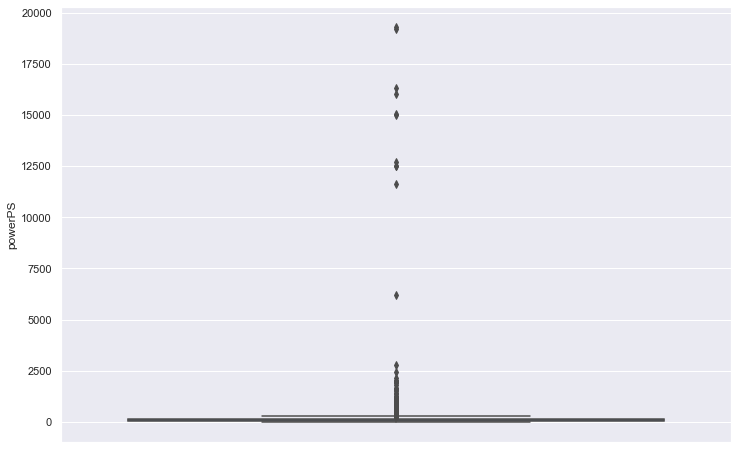

In [80]:
sns.boxplot(y=df['powerPS'])

<AxesSubplot:xlabel='powerPS', ylabel='price'>

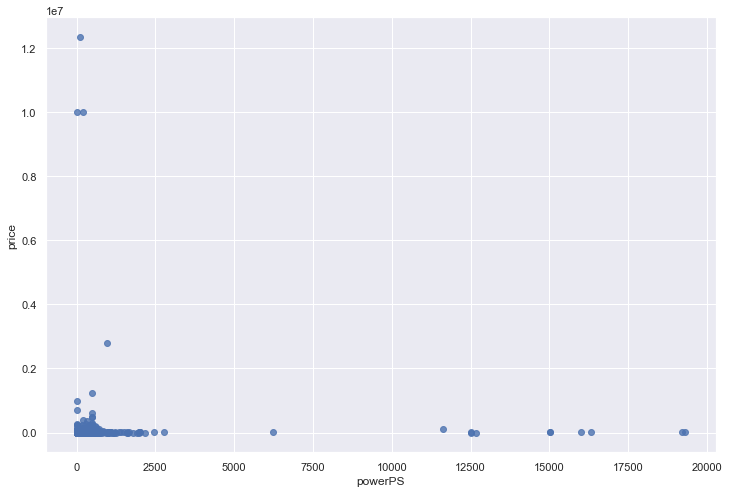

In [81]:
sns.regplot(x='powerPS', y='price' ,scatter=True, fit_reg=False, data=df)

In [82]:
sum(df['powerPS']>500)

115

In [83]:
sum(df['powerPS']<10)

5565

let Set the working range as 10 - 500 for Power

In [84]:
#SO now the working data 
df= df[
    (df.yearOfRegistration <=2022) & (df.yearOfRegistration >= 1950) &
    (df.price >= 100) & (df.price <= 200000) &
    (df.powerPS >= 10) & (df.powerPS <= 500)
    ]

In [85]:
df.shape

(42780, 14)

WE will combine the Year of registration and month registraion to find out the age of vehicle

In [86]:
#convert the month of registraion in terms of year

df['monthOfRegistration']/=12

In [87]:
#save the age in new column
df['age']= (2022- df['yearOfRegistration'] + df['monthOfRegistration'])

In [90]:
df

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,19.250
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,17.500
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,19.917
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,17.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,14.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,private,offer,790,test,limousine,manual,82,astra,150000,diesel,opel,no,24.750
49993,private,offer,830,test,small car,manual,60,clio,125000,petrol,renault,no,23.667
49994,private,offer,175000,control,coupe,manual,286,911,50000,petrol,porsche,no,24.167
49995,private,offer,2290,test,station wagon,manual,101,astra,150000,petrol,opel,no,21.250


We have  got a new column with age details . we can now remove the registration year and month from the dataframe

In [89]:
df=df.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)

In [91]:
df['age'].describe()

count   42780.000
mean       18.871
std         7.094
min         4.000
25%        14.333
50%        18.833
75%        23.167
max        71.750
Name: age, dtype: float64

In [92]:
#Visualising the data

C:\Users\psoms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

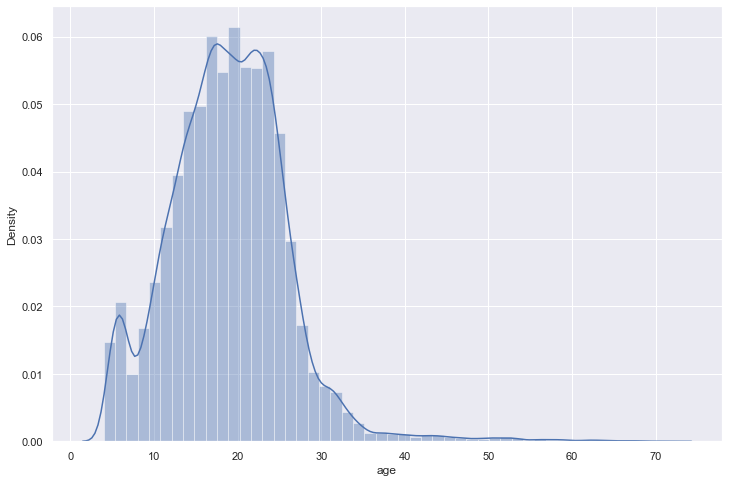

In [93]:
#age
sns.distplot (df['age'])

<AxesSubplot:ylabel='age'>

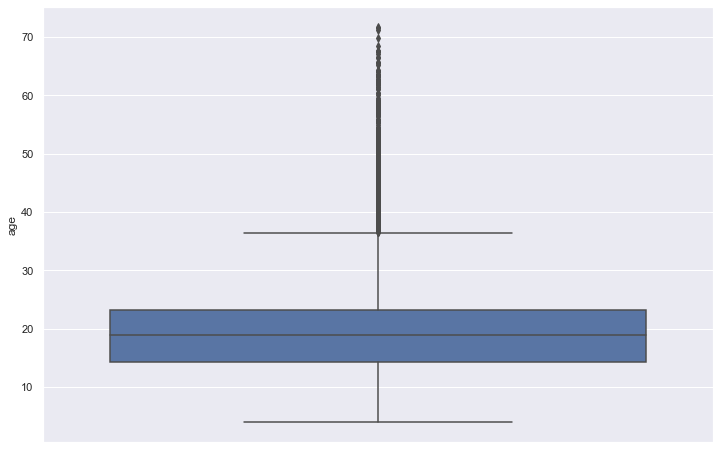

In [94]:
sns.boxplot(y= df['age'])

C:\Users\psoms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

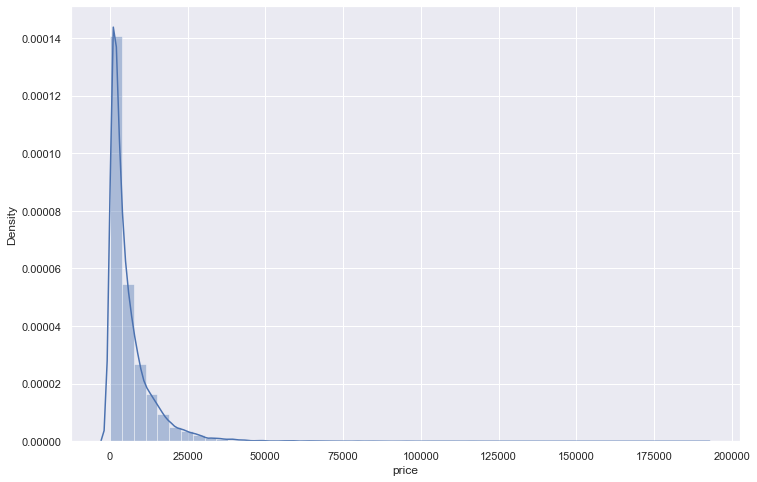

In [95]:
#price
sns.distplot(df['price'])

<AxesSubplot:ylabel='price'>

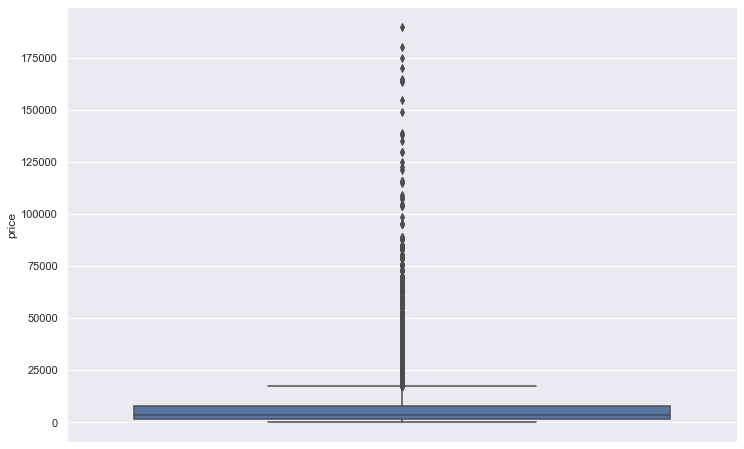

In [96]:
sns.boxplot(y= df['price'])

C:\Users\psoms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

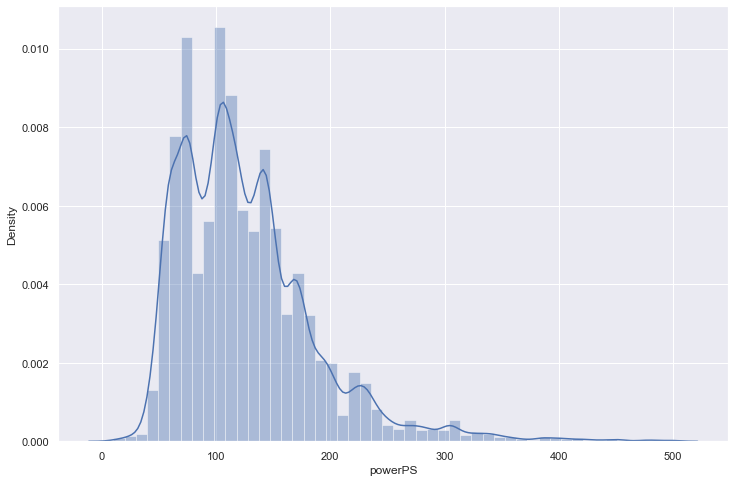

In [97]:
#power
sns.distplot(df['powerPS'])

<AxesSubplot:ylabel='powerPS'>

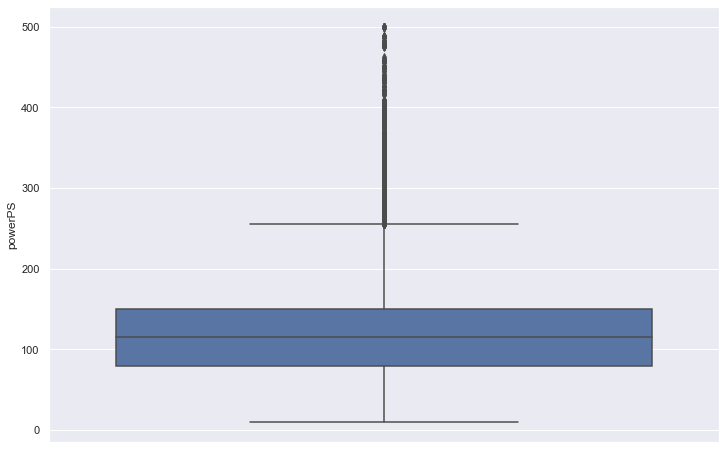

In [98]:
sns.boxplot(y= df['powerPS'])

So, Now after removing some extreme values we are able to atleast visualise the data set

<AxesSubplot:xlabel='age', ylabel='price'>

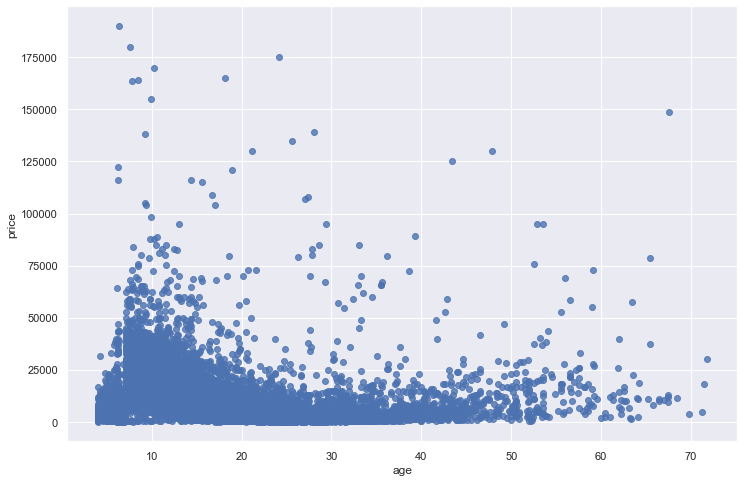

In [99]:
#visualising the impact of age on price of vehicle

sns.regplot(x='age', y='price', scatter=True, fit_reg=False, data=df)

the cars whih are newer are priced high in compare to older ones, SOme of the older cars are priced high that may be because they can be some old vintage edition vehicles

<AxesSubplot:xlabel='powerPS', ylabel='price'>

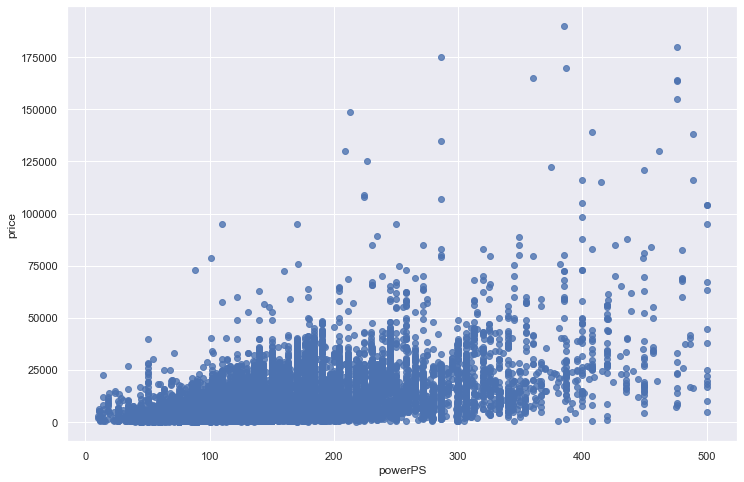

In [101]:
# impact of power of vehicle on price

sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=df)


So, thw vehicle with high power are high price

IMpact of categorical variables

In [102]:
#seller

df['seller'].value_counts()

private       42779
commercial        1
Name: seller, dtype: int64

Since only 1 seller is commercial, rest all are prvate. since very very small we will remove it from the dataset

In [103]:
# offer type

df['offerType'].value_counts()

offer    42780
Name: offerType, dtype: int64

So, all the vehicles are selling aunder offer kind, and no other variable is there.

In [104]:
# abtest
#ad version

df['abtest'].value_counts()

test       22132
control    20648
Name: abtest, dtype: int64

In [106]:
pd.crosstab(df['abtest'], columns='count', normalize= True)

col_0,count
abtest,
control,0.483
test,0.517


<AxesSubplot:xlabel='abtest', ylabel='price'>

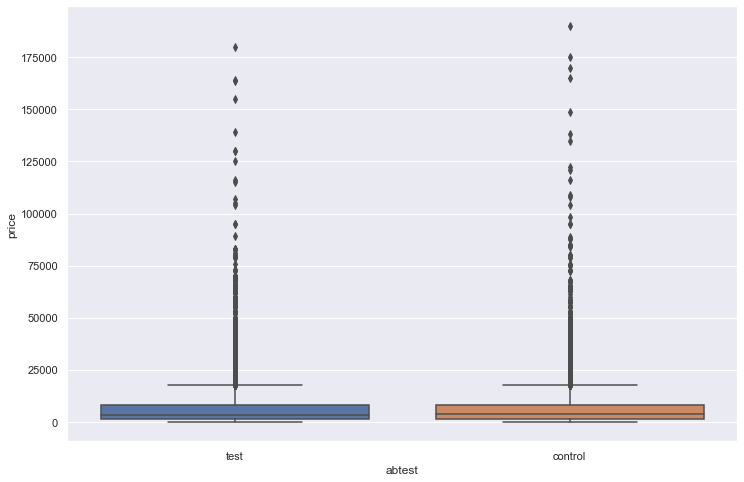

In [108]:
sns.boxplot(x='abtest', y='price', data=df)

So, for both the version test and control, we have approx 50-50distribution. and from the boxplot it can be seen that price is not affected by the type of abtest

In [109]:
#vehicle type
df['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2793
coupe             2268
suv               1813
others             326
Name: vehicleType, dtype: int64

In [110]:
pd.crosstab(df['vehicleType'], columns='count', normalize= True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

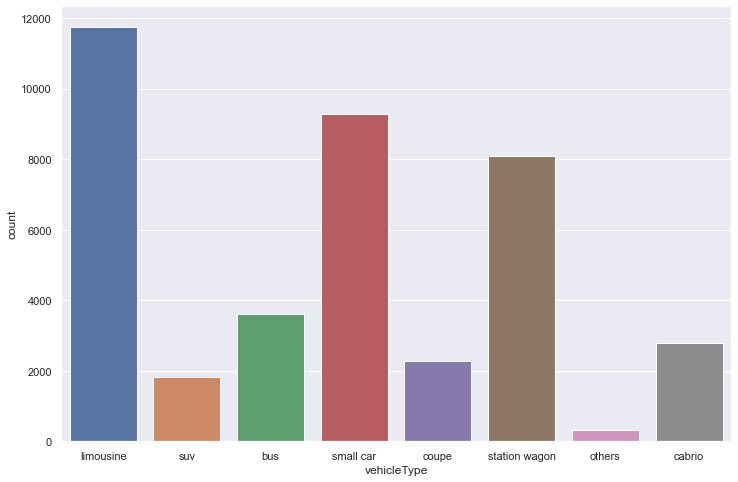

In [111]:
sns.countplot(x='vehicleType', data=df)

sufficient number of data points for each different categories of vehicle type

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

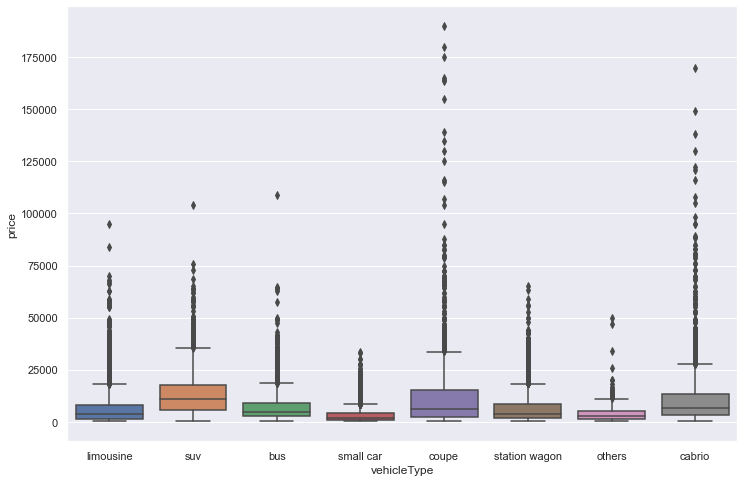

In [113]:
sns.boxplot(x='vehicleType', y='price', data=df)

So, from above it can be seen that the vehicle type does have an impact on the price of vehicle

#gearbox type

In [114]:
df['gearbox'].value_counts()

manual       32584
automatic     9401
Name: gearbox, dtype: int64

In [115]:
pd.crosstab(df['gearbox'], columns='count', normalize= True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<AxesSubplot:xlabel='gearbox', ylabel='price'>

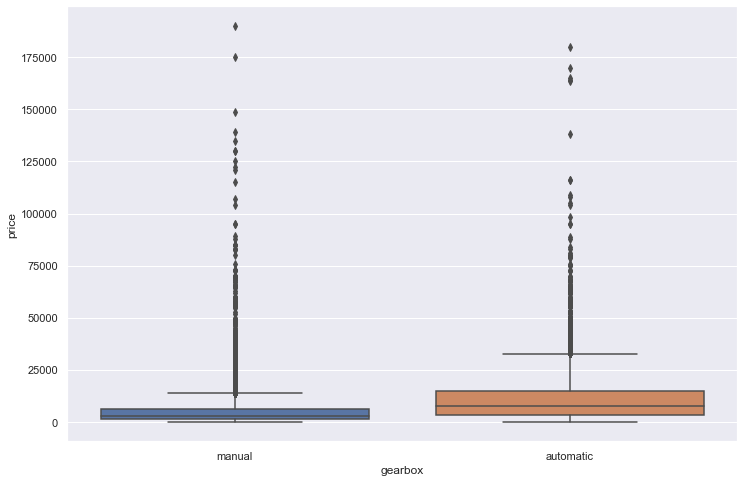

In [116]:
sns.boxplot(x='gearbox', y='price', data=df)

The gear box type , manual and automatic does have an impact on price of vehicles

In [117]:
#Vehicle model impact
df['model'].value_counts()

golf          3478
others        2901
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: model, Length: 247, dtype: int64

In [ ]:
SO, there are total 247 kind of models in the data set.

<AxesSubplot:xlabel='model', ylabel='price'>

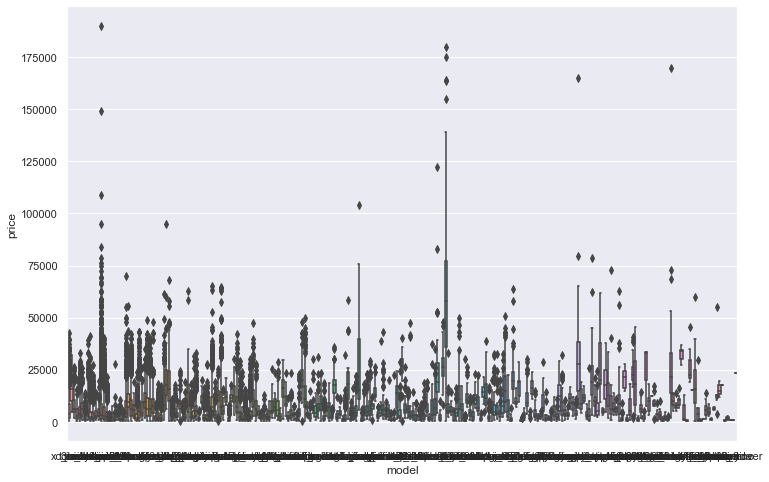

In [118]:
sns.boxplot(x='model', y='price', data=df)

as it is not visible clearly but one thing can be pointed out that the model type have an impact on the vehicle price

In [121]:
# Kilometer vehicle has been drown

df['kilometer'].value_counts().sort_index()

5000        481
10000       209
20000       652
30000       713
40000       796
50000       933
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [122]:
pd.crosstab(df['kilometer'], columns='count', normalize= True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


so the cars has been categorised in 13- KM categories. So, the Kilometers here are considered as categorical variable. MOst of the vehicles belong to 150K kilometer category.

<AxesSubplot:xlabel='kilometer', ylabel='price'>

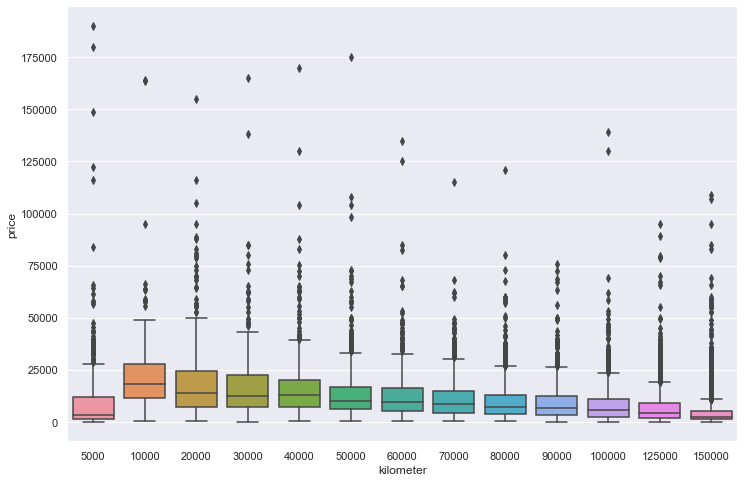

In [123]:
sns.boxplot(x='kilometer', y='price', data=df)

on a general node, the Kilometers drown has an impact on the vehicle price

In [125]:
# Fueltype
df['fuelType'].value_counts()

petrol     26516
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [126]:
pd.crosstab(df['fuelType'], columns='count', normalize= True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


There are 7 kind of fuel type vehicles

<AxesSubplot:xlabel='fuelType', ylabel='price'>

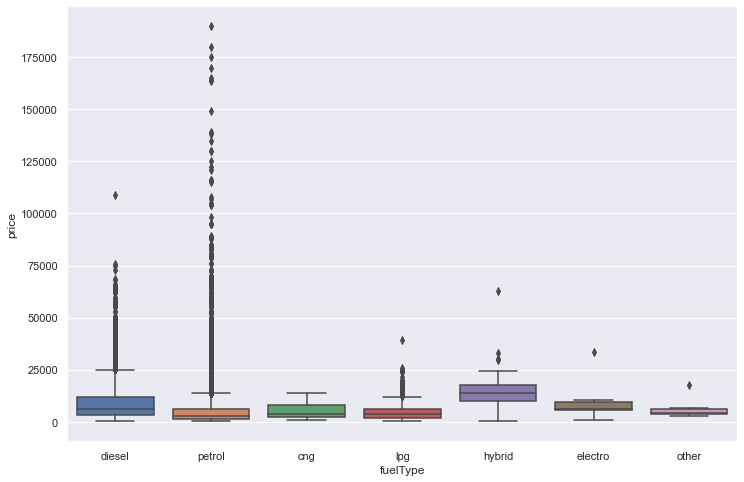

In [127]:
sns.boxplot(x='fuelType', y='price', data=df)

and fuels type does have an impact on the Vehicle price

In [129]:
#Vehicle brand

df['brand'].value_counts()


volkswagen        9134
bmw               4869
opel              4487
mercedes_benz     4135
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
porsche            266
suzuki             264
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

<AxesSubplot:xlabel='brand', ylabel='price'>

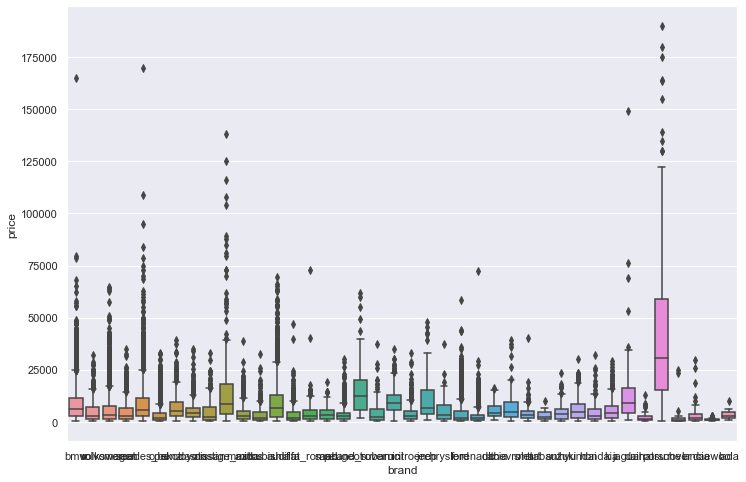

In [130]:
sns.boxplot(x='brand', y='price', data=df)

Multiple kind of vehicle brand are available and they do have an impact on the car price

In [132]:
#notRepairedDamage

df['notRepairedDamage'].value_counts()

no     32515
yes     3988
Name: notRepairedDamage, dtype: int64

In [133]:
pd.crosstab(df['notRepairedDamage'], columns='count', normalize= True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


In [134]:
# yes: car damaged but not repaired
# no: cara damaged and has been repaired also


<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

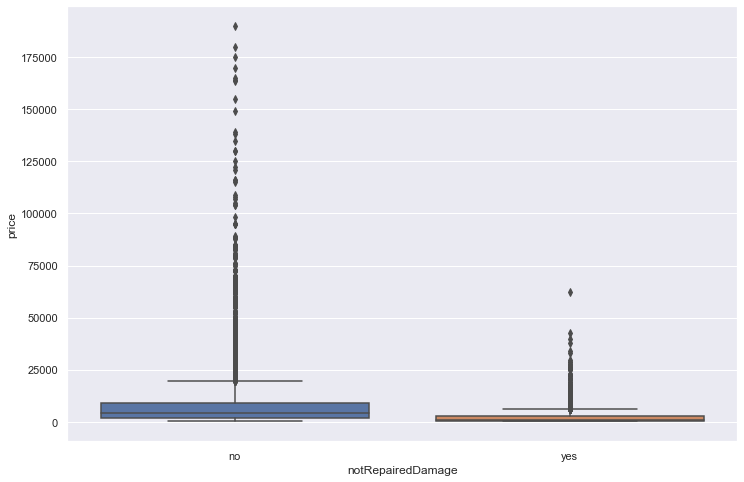

In [135]:
sns.boxplot(x='notRepairedDamage', y='price', data=df)

So, the car status has an impact on price

In [137]:
#NOW, we will remove the insignificat columns

col= ['seller', 'offerType', 'abtest']
df=df.drop(columns=col, axis=1)

In [138]:
df.shape

(42780, 10)

In [140]:
df1= copy.deepcopy(df) # saving a data set  

In [141]:
#Check for correlations 


In [143]:
cars_corr= df.select_dtypes(exclude=[object])

In [144]:
correlation= cars_corr.corr()

In [145]:
round(correlation,3)

,price,powerPS,kilometer,age
price,1.000,0.570,-0.433,-0.327
powerPS,0.570,1.000,-0.018,-0.152
kilometer,-0.433,-0.018,1.000,0.292
age,-0.327,-0.152,0.292,1.000


In [147]:
cars_corr.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.570
kilometer   0.433
age         0.327
Name: price, dtype: float64

So, there is no strong correlation observed between the features

In [151]:
df.shape

(42780, 10)

In [149]:
df.isnull().sum()

price                   0
vehicleType          2876
gearbox               795
powerPS                 0
model                1683
kilometer               0
fuelType             2598
brand                   0
notRepairedDamage    6277
age                     0
dtype: int64

Since we have a suffiefient amaount of null values also in some of the columns, we will try to build two types of models: one after removing all the null values and second after replacing the null values with mean/meadian values

In [152]:
#omitting missing values 

df_omit= df.dropna(axis=0)

In [155]:
df_omit.shape

(32891, 10)

In [156]:
df_omit.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
age                  0
dtype: int64

In [157]:
#converting categorical variables with dummy variables

df_omit= pd.get_dummies(df_omit, drop_first=True)

In [158]:
# import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [159]:
# mOdel building with Ommitted data

In [160]:
#input  and output variable

x1= df_omit.drop(['price'], axis='columns', inplace=False)
y1= df_omit['price']

array([[<AxesSubplot:title={'center':'1. before'}>,
        <AxesSubplot:title={'center':'2.after'}>]], dtype=object)

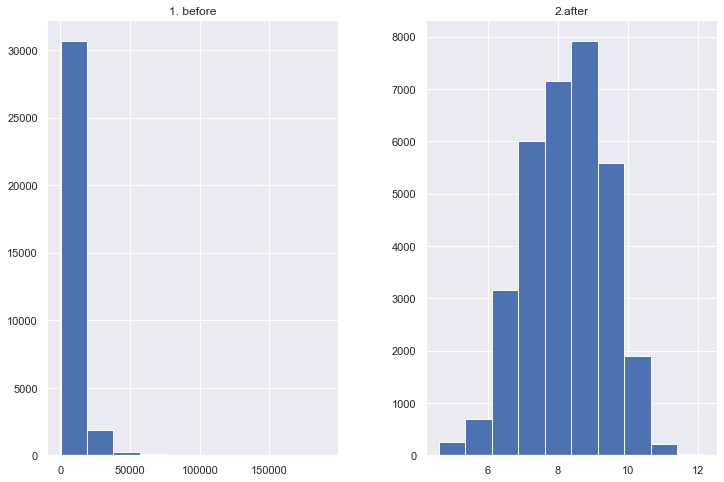

In [161]:
#plotting the variable y1

prices= pd.DataFrame({"1. before": y1, '2.after': np.log(y1)})

prices.hist()

So, after converting the y1 to log scale , it follows a nice Normal like distribution

In [162]:
y1= np.log(y1)

In [163]:
#splitting in to training and test set

X_train, X_test, y_train, y_test= train_test_split(x1, y1, test_size=0.3, random_state=3)
print(X_train.shape, y_train.shape, X_test.shape,  y_test.shape)

(23023, 300) (23023,) (9868, 300) (9868,)


In [165]:
#Baseline model for the Omitted data

#the baseline model wiith testdata mean value. it will set a benchmark for all the models predicted afterwards


In [166]:
#Meanof test data
base_pred= np.mean(y_test)
base_pred

8.234307571545296

In [167]:
#repeating same value till length of test data
base_pred= np.repeat(base_pred, len(y_test))

In [168]:
#finding RMSE

base_rmse= np.sqrt(mean_squared_error (y_test, base_pred))
base_rmse
                   

1.1419353241122736

base RMSe will act as benchmark for future models.

In [169]:
# LInear regression with omitted data

In [170]:
lgr= LinearRegression(fit_intercept = True)

In [171]:
model_lin1= lgr.fit(X_train, y_train) 

In [173]:
pred1= lgr.predict(X_test)

In [174]:
lin_rmse1= np.sqrt(mean_squared_error (y_test, pred1))
lin_rmse1

0.5500675333483847

So the model improve the rmse from base value

In [175]:
#R-squared value

r2_test_lin1= model_lin1.score(X_test, y_test)
r2_train_lin1= model_lin1.score(X_train, y_train)

r2_test_lin1, r2_train_lin1

(0.7679673982213033, 0.7798138501934643)

So, on the training set 77.9% and on test set 76.7 %-- good amount of fit in the data

<AxesSubplot:ylabel='price'>

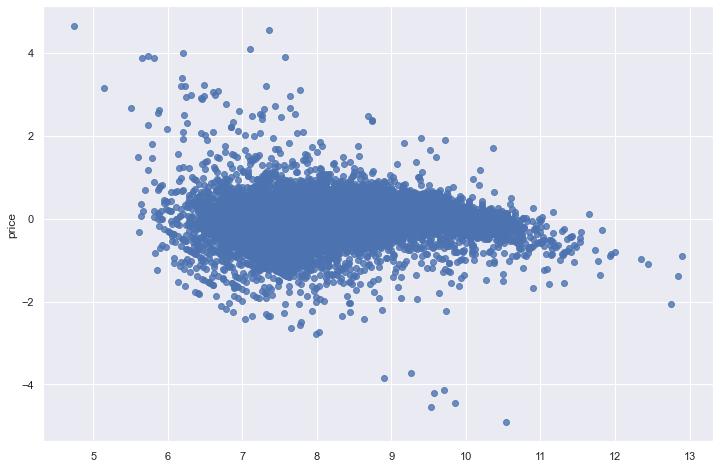

In [176]:
#Regression Diagnostics

residuals= y_test - pred1

sns.regplot(x= pred1, y= residuals, scatter= True, fit_reg= False,)


In [177]:
residuals.describe()

count   9868.000
mean      -0.008
std        0.550
min       -4.893
25%       -0.263
50%        0.032
75%        0.286
max        4.639
Name: price, dtype: float64

SO, the residuals are around 0. it suggest a good fit model

In [180]:
#Random Forest model with Omitted data

rf= RandomForestRegressor(n_estimators= 100, max_features='auto', max_depth=100, min_samples_split=10, 
                         min_samples_leaf= 4, random_state=1 )

In [181]:
model_rf1=rf.fit(X_train, y_train)

In [182]:
#predictions

pred_rf1= rf.predict(X_test)

In [183]:
rf_rmse1= np.sqrt(mean_squared_error (y_test, pred_rf1))
rf_rmse1

0.43431508946591224

In [184]:
# R2


r2_test_rf1= model_rf1.score(X_test, y_test)
r2_train_rf1= model_rf1.score(X_train, y_train)

r2_test_rf1, r2_train_rf1



(0.8553472075568743, 0.9198021573039885)

So in Random forest Algorithm, the R2 values for test data improved

In [185]:
# MOdel Building with Imputed data set

In [186]:
#fill all the null values with their median for float columns and with e mode values for categorical columns

df_imputed= df.apply(lambda x: x.fillna(x.median()) if x.dtypes == 'float' else x.fillna(x.value_counts().index[0]))

In [188]:
df_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
age                  0
dtype: int64

In [189]:
df_imputed.shape

(42780, 10)

In [190]:
#dummy value creation
df_imputed= pd.get_dummies(df_imputed, drop_first=True)


In [191]:
df_imputed.shape

(42780, 304)

In [192]:
#input  and output variable

x2= df_imputed.drop(['price'], axis='columns', inplace=False)
y2= df_imputed['price']

array([[<AxesSubplot:title={'center':'1. before'}>,
        <AxesSubplot:title={'center':'2.after'}>]], dtype=object)

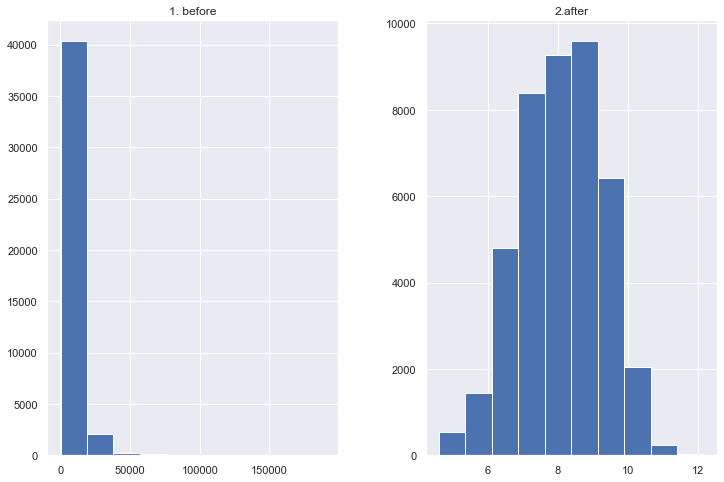

In [193]:
#plotting the variable y2

prices2= pd.DataFrame({"1. before": y2, '2.after': np.log(y2)})

prices2.hist()

In [194]:
y2= np.log(y2)

In [195]:
#splitting in to training and test set

X_train2, X_test2, y_train2, y_test2= train_test_split(x2, y2, test_size=0.3, random_state=3)
print(X_train2.shape, y_train2.shape, X_test2.shape,  y_test2.shape)

(29946, 303) (29946,) (12834, 303) (12834,)


In [196]:
#Baseline model for the imputed data set

#Mean of test data
base_pred2= np.mean(y_test2)

#repeating same value till length of test data
base_pred2= np.repeat(base_pred2, len(y_test2))

#finding RMSE

base_rmse2= np.sqrt(mean_squared_error (y_test2, base_pred2))
base_rmse2
             

1.1653877461558673

In [198]:
#Linear regression model

lgr2= LinearRegression(fit_intercept = True)
model_lin2= lgr2.fit(X_train2, y_train2)
lin_pred2= lgr2.predict(X_test2)
lin_rmse2= np.sqrt(mean_squared_error (y_test2, lin_pred2))
lin_rmse2



0.6326591485610891

improved from baseline rmse value

In [199]:
#R-squared value

r2_test_lin2= model_lin2.score(X_test2, y_test2)
r2_train_lin2= model_lin2.score(X_train2, y_train2)

r2_test_lin2, r2_train_lin2

(0.7052874090236383, 0.7071518686705336)

So, for linear regression the R2 values are less if we compare with the case of Omitted data set

<AxesSubplot:ylabel='price'>

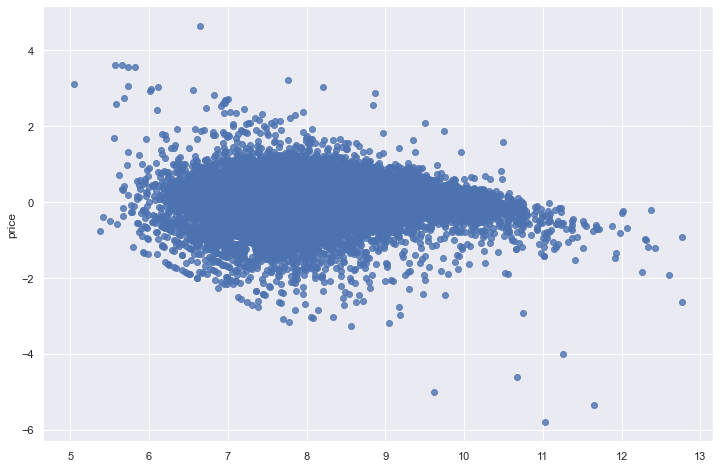

In [200]:
#Regression Diagnostics

residuals2= y_test2 - lin_pred2

sns.regplot(x= lin_pred2, y= residuals2, scatter= True, fit_reg= False,)


In [201]:
#Random Forest model with imputed data

rf2= RandomForestRegressor(n_estimators= 100, max_features='auto', max_depth=100, min_samples_split=10, 
                         min_samples_leaf= 4, random_state=1 )

In [202]:
model_rf2=rf2.fit(X_train2, y_train2)

#predictions
pred_rf2= rf2.predict(X_test2)

rf_rmse2= np.sqrt(mean_squared_error (y_test2, pred_rf2))
rf_rmse2

0.47830864223989317

In [203]:
# R2


r2_test_rf2= model_rf2.score(X_test2, y_test2)
r2_train_rf2= model_rf2.score(X_train2, y_train2)

r2_test_rf2, r2_train_rf2



(0.8315482367219797, 0.9018685714503656)

So, Again for the car price prediction with the imputed data set too, Random forest has a better prediction score than the Linear model.
